# Convolutional Neural Networks

# Importar Librerías

In [15]:
import numpy as np
import cv2
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [16]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential,Input,Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU


# Cargar set de Imágenes

In [17]:
dirname = os.path.join(os.getcwd(),"DataLetras")
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "\nLeyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Carpetas:',len(directories))
print("Imagenes por carpeta", dircount)
print('suma Total de imagenes en subcarpetas:',sum(dircount))

leyendo imagenes de  C:\jupyter\DataLetras\

C:\jupyter\DataLetras\Amayus 1

Leyendo...1
Leyendo...2
Leyendo...3
Leyendo...4
Leyendo...5
Leyendo...6
Leyendo...7
Leyendo...8
Leyendo...9
Leyendo...10
C:\jupyter\DataLetras\Amin 11

Leyendo...1
Leyendo...2
Leyendo...3
Leyendo...4
Leyendo...5
Leyendo...6
Leyendo...7
Leyendo...8
Leyendo...9
Leyendo...10
C:\jupyter\DataLetras\Emayus 11

Leyendo...1
Leyendo...2
Leyendo...3
Leyendo...4
Leyendo...5
Leyendo...6
Leyendo...7
Leyendo...8
Leyendo...9
Leyendo...10
C:\jupyter\DataLetras\Emin 11

Leyendo...1
Leyendo...2
Leyendo...3
Leyendo...4
Leyendo...5
Leyendo...6
Leyendo...7
Leyendo...8
Leyendo...9
Leyendo...10
C:\jupyter\DataLetras\Imayus 11

Leyendo...1
Leyendo...2
Leyendo...3
Leyendo...4
Leyendo...5
Leyendo...6
Leyendo...7
Leyendo...8
Leyendo...9
Leyendo...10
C:\jupyter\DataLetras\Imin 11

Leyendo...1
Leyendo...2
Leyendo...3
Leyendo...4
Leyendo...5
Leyendo...6
Leyendo...7
Leyendo...8
Leyendo...9
Leyendo...10
Leyendo...11
Leyendo...12
Leyendo...13

# Creamos las etiquetas

In [18]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  185


In [19]:
letras=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    letras.append(name[len(name)-1])
    indice=indice+1

0 Amayus
1 Amin
2 Emayus
3 Emin
4 Imayus
5 Imin
6 Omayus
7 Omin
8 Sand
9 Sgato
10 Spesos
11 Sporc
12 Umayus
13 Umin


In [20]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  14
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


# Creamos Sets de Entrenamiento y Test

In [21]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (148, 25, 25, 3) (148,)
Testing data shape :  (37, 25, 25, 3) (37,)


Text(0.5, 1.0, 'Ground Truth : 3')

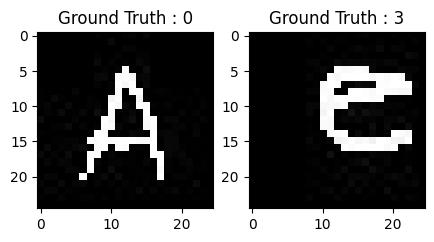

In [22]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

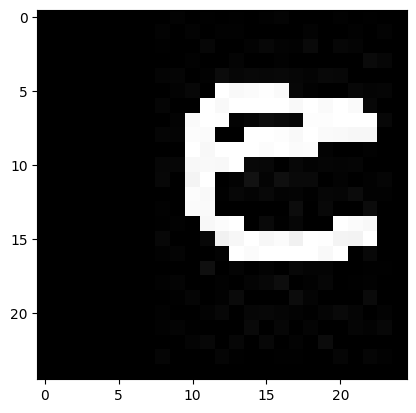

In [23]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [24]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [25]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [26]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(118, 25, 25, 3) (30, 25, 25, 3) (118, 14) (30, 14)


# Creamos el modelo de CNN

In [27]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 300 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [28]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(25,25,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [29]:
sport_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        896       
                                                                 
 module_wrapper (ModuleWrapp  (None, 25, 25, 32)       0         
 er)                                                             
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                1

In [30]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adagrad(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [31]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/300
2/2 [==============================] - 1s 321ms/step - loss: 2.6878 - accuracy: 0.0678 - val_loss: 2.6420 - val_accuracy: 0.0333
Epoch 2/300
2/2 [==============================] - 0s 66ms/step - loss: 2.6767 - accuracy: 0.0763 - val_loss: 2.6421 - val_accuracy: 0.0000e+00
Epoch 3/300
2/2 [==============================] - 0s 71ms/step - loss: 2.7115 - accuracy: 0.0508 - val_loss: 2.6416 - val_accuracy: 0.0000e+00
Epoch 4/300
2/2 [==============================] - 0s 68ms/step - loss: 2.6692 - accuracy: 0.0593 - val_loss: 2.6401 - val_accuracy: 0.0000e+00
Epoch 5/300
2/2 [==============================] - 0s 79ms/step - loss: 2.6658 - accuracy: 0.0593 - val_loss: 2.6389 - val_accuracy: 0.0000e+00
Epoch 6/300
2/2 [==============================] - 0s 61ms/step - loss: 2.6781 - accuracy: 0.0678 - val_loss: 2.6388 - val_accuracy: 0.0000e+00
Epoch 7/300
2/2 [==============================] - 0s 64ms/step - loss: 2.6632 - accuracy: 0.0847 - val_loss: 2.6377 - val_accuracy: 0.0000

Epoch 59/300
2/2 [==============================] - 0s 68ms/step - loss: 2.4822 - accuracy: 0.2203 - val_loss: 2.5881 - val_accuracy: 0.1667
Epoch 60/300
2/2 [==============================] - 0s 66ms/step - loss: 2.4432 - accuracy: 0.2288 - val_loss: 2.5874 - val_accuracy: 0.2000
Epoch 61/300
2/2 [==============================] - 0s 62ms/step - loss: 2.4400 - accuracy: 0.1780 - val_loss: 2.5867 - val_accuracy: 0.2000
Epoch 62/300
2/2 [==============================] - 0s 69ms/step - loss: 2.3859 - accuracy: 0.2966 - val_loss: 2.5846 - val_accuracy: 0.2000
Epoch 63/300
2/2 [==============================] - 0s 67ms/step - loss: 2.4549 - accuracy: 0.2627 - val_loss: 2.5841 - val_accuracy: 0.1667
Epoch 64/300
2/2 [==============================] - 0s 63ms/step - loss: 2.4415 - accuracy: 0.1864 - val_loss: 2.5823 - val_accuracy: 0.2000
Epoch 65/300
2/2 [==============================] - 0s 57ms/step - loss: 2.4093 - accuracy: 0.2542 - val_loss: 2.5819 - val_accuracy: 0.2000
Epoch 66/300


Epoch 117/300
2/2 [==============================] - 0s 64ms/step - loss: 2.3202 - accuracy: 0.2542 - val_loss: 2.4959 - val_accuracy: 0.2333
Epoch 118/300
2/2 [==============================] - 0s 71ms/step - loss: 2.2385 - accuracy: 0.3729 - val_loss: 2.4954 - val_accuracy: 0.2333
Epoch 119/300
2/2 [==============================] - 0s 71ms/step - loss: 2.2400 - accuracy: 0.2797 - val_loss: 2.4924 - val_accuracy: 0.2667
Epoch 120/300
2/2 [==============================] - 0s 74ms/step - loss: 2.2413 - accuracy: 0.3305 - val_loss: 2.4913 - val_accuracy: 0.2667
Epoch 121/300
2/2 [==============================] - 0s 73ms/step - loss: 2.2199 - accuracy: 0.3475 - val_loss: 2.4883 - val_accuracy: 0.2667
Epoch 122/300
2/2 [==============================] - 0s 67ms/step - loss: 2.2586 - accuracy: 0.2627 - val_loss: 2.4862 - val_accuracy: 0.3000
Epoch 123/300
2/2 [==============================] - 0s 68ms/step - loss: 2.1949 - accuracy: 0.3559 - val_loss: 2.4848 - val_accuracy: 0.2667
Epoch 

Epoch 175/300
2/2 [==============================] - 0s 60ms/step - loss: 2.0172 - accuracy: 0.4153 - val_loss: 2.3841 - val_accuracy: 0.3333
Epoch 176/300
2/2 [==============================] - 0s 70ms/step - loss: 2.0547 - accuracy: 0.3814 - val_loss: 2.3822 - val_accuracy: 0.3333
Epoch 177/300
2/2 [==============================] - 0s 84ms/step - loss: 1.9831 - accuracy: 0.3475 - val_loss: 2.3789 - val_accuracy: 0.3333
Epoch 178/300
2/2 [==============================] - 0s 91ms/step - loss: 1.9438 - accuracy: 0.4492 - val_loss: 2.3782 - val_accuracy: 0.3333
Epoch 179/300
2/2 [==============================] - 0s 78ms/step - loss: 2.0951 - accuracy: 0.3898 - val_loss: 2.3773 - val_accuracy: 0.3333
Epoch 180/300
2/2 [==============================] - 0s 62ms/step - loss: 1.9455 - accuracy: 0.4153 - val_loss: 2.3737 - val_accuracy: 0.3333
Epoch 181/300
2/2 [==============================] - 0s 64ms/step - loss: 1.9882 - accuracy: 0.3559 - val_loss: 2.3731 - val_accuracy: 0.3333
Epoch 

Epoch 233/300
2/2 [==============================] - 0s 59ms/step - loss: 1.8427 - accuracy: 0.4576 - val_loss: 2.2743 - val_accuracy: 0.3667
Epoch 234/300
2/2 [==============================] - 0s 59ms/step - loss: 1.8242 - accuracy: 0.4915 - val_loss: 2.2726 - val_accuracy: 0.3333
Epoch 235/300
2/2 [==============================] - 0s 61ms/step - loss: 1.8930 - accuracy: 0.4492 - val_loss: 2.2719 - val_accuracy: 0.3333
Epoch 236/300
2/2 [==============================] - 0s 62ms/step - loss: 1.8958 - accuracy: 0.3559 - val_loss: 2.2688 - val_accuracy: 0.3333
Epoch 237/300
2/2 [==============================] - 0s 63ms/step - loss: 1.7567 - accuracy: 0.4831 - val_loss: 2.2682 - val_accuracy: 0.3667
Epoch 238/300
2/2 [==============================] - 0s 61ms/step - loss: 1.9061 - accuracy: 0.4068 - val_loss: 2.2663 - val_accuracy: 0.3667
Epoch 239/300
2/2 [==============================] - 0s 57ms/step - loss: 1.9028 - accuracy: 0.3898 - val_loss: 2.2626 - val_accuracy: 0.3667
Epoch 

Epoch 291/300
2/2 [==============================] - 0s 98ms/step - loss: 1.6397 - accuracy: 0.5593 - val_loss: 2.1838 - val_accuracy: 0.3667
Epoch 292/300
2/2 [==============================] - 0s 82ms/step - loss: 1.7458 - accuracy: 0.4492 - val_loss: 2.1799 - val_accuracy: 0.3667
Epoch 293/300
2/2 [==============================] - 0s 78ms/step - loss: 1.6597 - accuracy: 0.5000 - val_loss: 2.1777 - val_accuracy: 0.3667
Epoch 294/300
2/2 [==============================] - 0s 76ms/step - loss: 1.7284 - accuracy: 0.5085 - val_loss: 2.1743 - val_accuracy: 0.3667
Epoch 295/300
2/2 [==============================] - 0s 78ms/step - loss: 1.7205 - accuracy: 0.4831 - val_loss: 2.1735 - val_accuracy: 0.3667
Epoch 296/300
2/2 [==============================] - 0s 84ms/step - loss: 1.7700 - accuracy: 0.5000 - val_loss: 2.1738 - val_accuracy: 0.3667
Epoch 297/300
2/2 [==============================] - 0s 82ms/step - loss: 1.7193 - accuracy: 0.4831 - val_loss: 2.1701 - val_accuracy: 0.3667
Epoch 

In [32]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("C:/jupyter/NuevasLetras/ResultadoLestrasFinal.h5py")

INFO:tensorflow:Assets written to: C:/jupyter/NuevasLetras/ResultadoLestrasFinal.h5py\assets


INFO:tensorflow:Assets written to: C:/jupyter/NuevasLetras/ResultadoLestrasFinal.h5py\assets


# Evaluamos la red

In [33]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

2/2 [==============================] - 0s 4ms/step - loss: 1.8444 - accuracy: 0.4865


In [34]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.8443603515625
Test accuracy: 0.4864864945411682


In [35]:
sport_train.history

{'loss': [2.6878135204315186,
  2.676724672317505,
  2.71152663230896,
  2.669189929962158,
  2.6657631397247314,
  2.6780905723571777,
  2.663167715072632,
  2.6477506160736084,
  2.6342763900756836,
  2.6032886505126953,
  2.671661853790283,
  2.628394603729248,
  2.627915382385254,
  2.6250784397125244,
  2.6473827362060547,
  2.619457244873047,
  2.6030690670013428,
  2.592040538787842,
  2.60758113861084,
  2.5731351375579834,
  2.6086647510528564,
  2.5547327995300293,
  2.559523582458496,
  2.57924485206604,
  2.523810386657715,
  2.574887752532959,
  2.5585286617279053,
  2.5409159660339355,
  2.57027006149292,
  2.5270869731903076,
  2.5577290058135986,
  2.553609609603882,
  2.501943826675415,
  2.5370755195617676,
  2.5603699684143066,
  2.5431246757507324,
  2.517575263977051,
  2.5442233085632324,
  2.5393686294555664,
  2.501852512359619,
  2.4863924980163574,
  2.4922215938568115,
  2.5018270015716553,
  2.523016929626465,
  2.535784959793091,
  2.5069613456726074,
  2.4

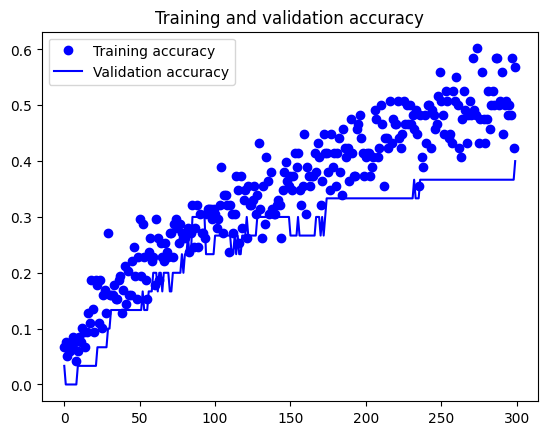

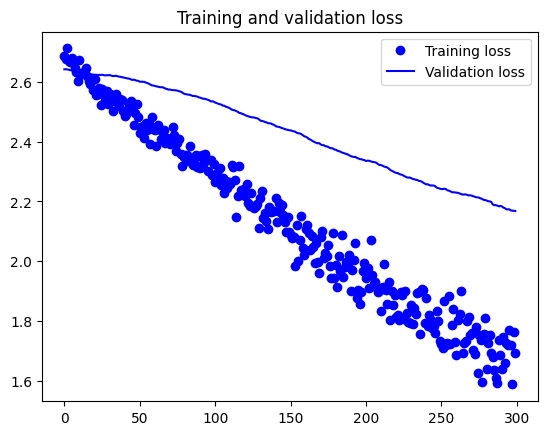

In [36]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [37]:
predicted_classes2 = sport_model.predict(test_X)

2/2 [==============================] - 0s 4ms/step


In [38]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [39]:
predicted_classes.shape, test_Y.shape

((37,), (37,))

# Aprendamos de los errores: Qué mejorar

Found 18 correct labels


C:\Users\mikoh\AppData\Local\Temp\ipykernel_19752\1136608022.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


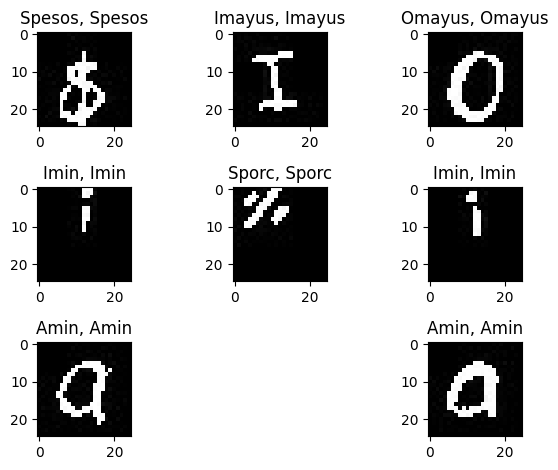

In [40]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(25,25,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(letras[predicted_classes[correct]],
                                                    letras[test_Y[correct]]))

    plt.tight_layout()

Found 19 incorrect labels


C:\Users\mikoh\AppData\Local\Temp\ipykernel_19752\3643732845.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


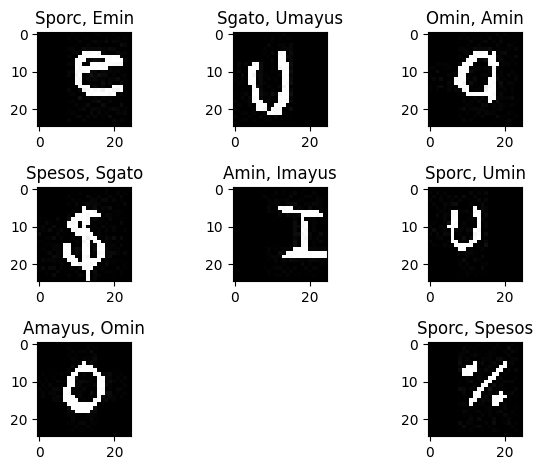

In [44]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(25,25,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(letras[predicted_classes[incorrect]],
                                                    letras[test_Y[incorrect]]))
    plt.tight_layout()

In [45]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

ValueError: Number of classes, 13, does not match size of target_names, 14. Try specifying the labels parameter

In [66]:
carpeta = tf.keras.models.load_model('C:/jupyter/NuevasLetras/ResultadoLestrasFinal.h5py')

letra = cv2.imread('letra.jpg')
letraArr = np.array(letra)
letraArr = np.expand_dims(letraArr, axis=0)
prediction = model.predict(letraArr)#[0][0]
    
print(prediction)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: Exception encountered when calling layer "module_wrapper_2" (type ModuleWrapper).

duplicate parameter name: 'training'

Call arguments received by layer "module_wrapper_2" (type ModuleWrapper):
  • args=('tf.Tensor(shape=(None, 25, 25, 32), dtype=float32)',)
  • kwargs={'training': 'False'}